## EXPERIMENTS

We will be compare 5 five cases with DQL Freeway.

All in all, these are the parameters that we are going to use to execute this experiment.


<table ><tr><th>Parameters<th>N1<th>N2<th>N3<th>N4<th>N5<th>N6<th>N7<tr><tr>
<tr><td> GAMMA <td> 0.99 <td>0.99 <td>0.99 <td>0.99 <td>0.99 <td>0.99 <td> 0.99 <tr>
<tr><td> AVAILABLE_ACTIONS <td> 2 <td>2 <td>2 <td>2 <td>2 <td>2 <td> 2 <tr>
<tr><td> N0 <td> 2.5 <td>2.5 <td>2.5 <td>2.5 <td>2.5 <td>5.0 <td> 0.001 <tr>
<tr><td> CROSS <td> 10 <td>10 <td>10 <td> 100 <td>500 <td>500 <td> 500 <tr>
<tr><td> COLLISION <td> -10 <td>-10 <td>-10 <td>-10 <td>-10 <td>-10 <td> -10 <tr>
<tr><td> STILL <td> 0 <td>0 <td>0 <td>0 <td>0 <td>0 <td> 0 <tr>
<tr><td> NB_EPOCHS <td> 501 <td> 701 <td> 1001 <td> 1001 <td> 1001 <td> 1001 <td>1001<tr>
<table>



## Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import src.aux_plots as axplot
import dill

import src.agents as agents
import src.episode as episode
import src.environment as environment
import src.aux_plots as aux_plots
import src.serializer as serializer

FIGSIZE = (10, 6)
DPI = 80

In [4]:
N1 = pd.read_csv("DQL_GAMMA(0.99)_N0(2.5))_R(CRO_10-COL_-10)_EP501/DQL_GAMMA(0.99)_N0(2.5))_R(CRO_10-COL_-10)_EP501.csv", sep=',', on_bad_lines="skip")
N2 = pd.read_csv("DQL_GAMMA(0.99)_N0(2.5))_R(CRO_10-COL_-10)_EP701/DQL_GAMMA(0.99)_N0(2.5))_R(CRO_10-COL_-10)_EP701.csv", sep=',', on_bad_lines="skip")
N3 = pd.read_csv("DQL_GAMMA(0.99)_N0(2.5))_R(CRO_10-COL_-10)_EP1001/DQL_GAMMA(0.99)_N0(2.5))_R(CRO_10-COL_-10)_EP1001.csv", sep=',', on_bad_lines="skip")
N4 = pd.read_csv("DQL_GAMMA(0.99)_N0(2.5))_R(CRO_100-COL_-10)_EP1001/DQL_GAMMA(0.99)_N0(2.5))_R(CRO_100-COL_-10)_EP1001.csv", sep=',', on_bad_lines="skip")
N5 = pd.read_csv("DQL_GAMMA(0.99)_N0(2.5))_R(CRO_500-COL_-10)_EP1001/DQL_GAMMA(0.99)_N0(2.5))_R(CRO_500-COL_-10)_EP1001.csv", sep=',', on_bad_lines="skip")
N6 = pd.read_csv("DQL_GAMMA(0.99)_N0(5))_R(CRO_500-COL_-10)_EP1001/DQL_GAMMA(0.99)_N0(5))_R(CRO_500-COL_-10)_EP1001.csv", sep=',', on_bad_lines="skip")
N7 = pd.read_csv("DQL_GAMMA(0.99)_N0(0.001))_R(CRO_500-COL_-10)_EP1001/DQL_GAMMA(0.99)_N0(0.001))_R(CRO_500-COL_-10)_EP1001.csv", sep=',', on_bad_lines="skip")

list = [N1, N2, N3, N4, N5, N6, N7]

In [5]:

def display_3graph(chart1, chart2, chart3, label1, label2, label3, xlabel, ylabel):
    fig = plt.figure(figsize=FIGSIZE, dpi=DPI)
    ax = fig.add_subplot(1, 1, 1)
    
    ax.plot(chart1, color='cyan', label=label1, alpha=0.5)
    ax.plot(chart2, color='magenta', label=label2, alpha=0.5)
    ax.plot(chart3, color='#C02323', label=label3, alpha=0.5)
    plt.legend()
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    return ax

In [6]:
def display_7graph(chart1, chart2, chart3, chart4, chart5, chart6, chart7, label1, label2, label3, label4, label5, label6, label7, xlabel, ylabel):
    fig = plt.figure(figsize=FIGSIZE, dpi=DPI)
    ax = fig.add_subplot(1, 1, 1)

    axplot.moving_average(chart1, ax, label=label1, color='cyan')
    axplot.moving_average(chart2, ax, label=label2, color='magenta')
    axplot.moving_average(chart3, ax, label=label3, color='#C02323')
    axplot.moving_average(chart4, ax, label=label4, color='#49f309')
    axplot.moving_average(chart5, ax, label=label5, color='#f30982')
    axplot.moving_average(chart6, ax, label=label6, color='#09f3de')
    axplot.moving_average(chart7, ax, label=label7, color='#eff309')

    plt.legend()
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    return ax

# Experiments

We decided to divide our experiment into 3 stages by working on several hyper parameters, EPOCHS, CROSS, COLLISION and N0 value.
- Depending on the epochs: 501 then 1001 epochs.
- Based on CROSS and Collision values.
- Then according to the value of N0

## Hyper parameters visualization

#### Influence of the epochs number

The epochs numbers determines a complete run of the training dataset through the algorithm. We have started with 501 epochs and changed to 1001. We can see the number of epochs allow to improve the model.

This experiment concernes N1, N2, N3.

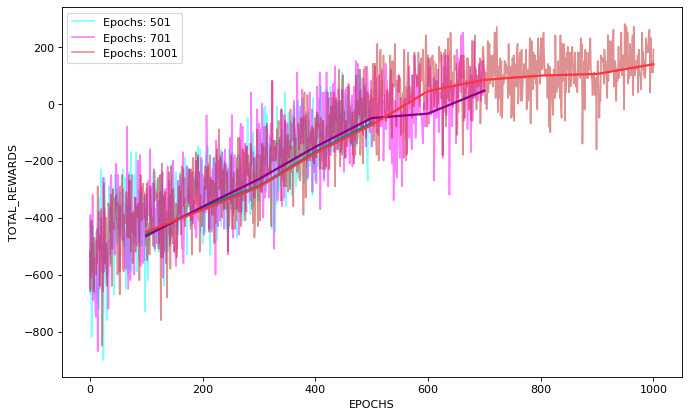

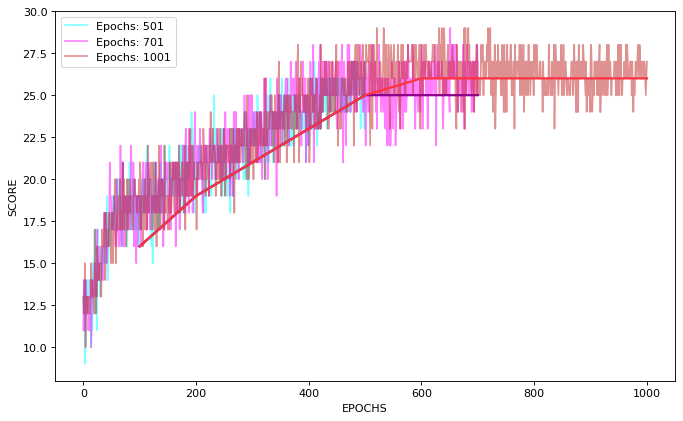

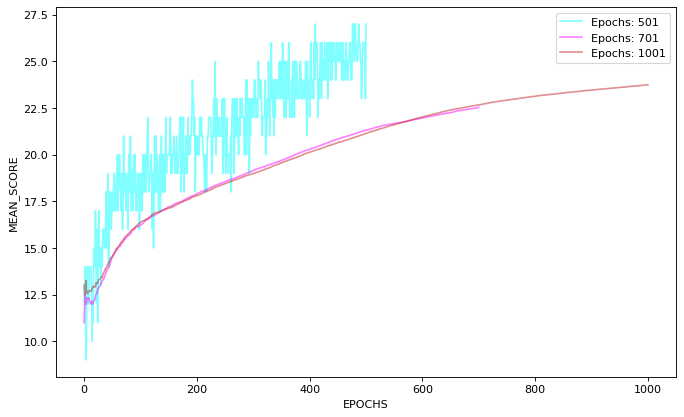

In [8]:
ax = display_3graph(N1['TOTAL_REWARDS'].to_numpy(), N2['TOTAL_REWARDS'].to_numpy(), N3['TOTAL_REWARDS'].to_numpy(), "Epochs: 501", "Epochs: 701", "Epochs: 1001", xlabel="EPOCHS", ylabel="TOTAL_REWARDS")

axplot.moving_average(N1['TOTAL_REWARDS'].to_numpy(), ax, label="epochs=501", color='darkcyan')
axplot.moving_average(N2['TOTAL_REWARDS'].to_numpy(), ax, label="epochs=701", color='darkmagenta')
axplot.moving_average(N3['TOTAL_REWARDS'].to_numpy(), ax, label="epochs=1001", color='#FF3341')

axTTRewards = display_3graph(N1['SCORE'].to_numpy(), N2['SCORE'].to_numpy(), N3['SCORE'].to_numpy(), "Epochs: 501", "Epochs: 701", "Epochs: 1001", xlabel="EPOCHS", ylabel="SCORE")

axplot.moving_average(N1['SCORE'].to_numpy(), axTTRewards, label="epochs=501", color='darkcyan')
axplot.moving_average(N2['SCORE'].to_numpy(), axTTRewards, label="epochs=701", color='darkmagenta')
axplot.moving_average(N3['SCORE'].to_numpy(), axTTRewards, label="epochs=1001", color='#FF3341')

axMeanScore = display_3graph(N1['SCORE'].to_numpy(), N2['MEAN_SCORE'].to_numpy(), N3['MEAN_SCORE'].to_numpy(), "Epochs: 501", "Epochs: 701", "Epochs: 1001", xlabel="EPOCHS", ylabel="MEAN_SCORE")

Also, we can conclude that a number of epochs greater than 700 is necessary to obtain a suitable model.

For the rest, we will decide to choose a number of 1001 epochs.

#### Influence of CROSS and COLLISION values

In order to investigate the influence of the reward values in the agent behavior, we ran the algorithm using three different sets of reward values.

* **N4:** Positive rewards for crossing: it offered a sparse reward to the agent: +10 if the chicken cross all the lanes and -10 if the chicken collide.  
* **N5:** Positive rewards for crossing and negative reward for colliding: it given +100 for crossing all the lanes and -10 if the chicken collide. Thus, we expect the agent to be encouraged to cross the lanes (positive reward) and to avoid collisions (negative reward).  
* **N6:** Huge positive reward for crossing and negative reward for colliding or staying in the same position: it increased the reward for crossing all the lanes to +500 and give -10 when the chicken collide. Thus we expect the chicken to cross all the lanes faster and increase the final score.

This experiment concernes N3, N4 and N5.

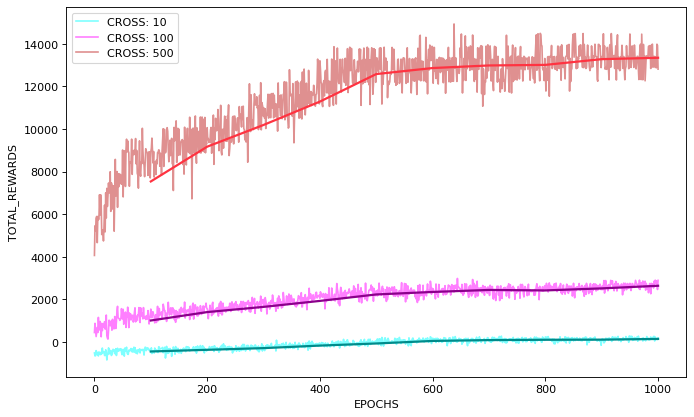

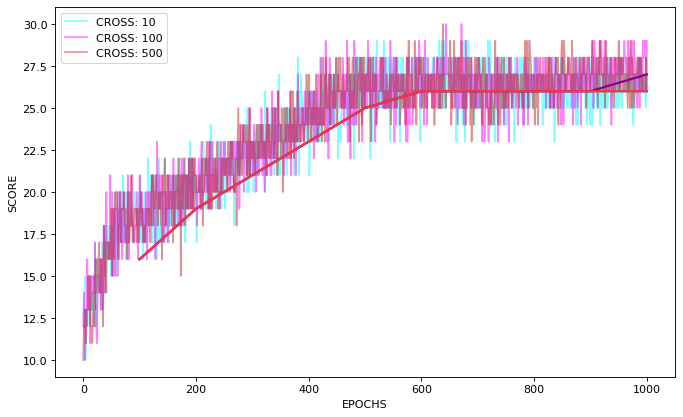

In [9]:
ax = display_3graph(N3['TOTAL_REWARDS'].to_numpy(), N4['TOTAL_REWARDS'].to_numpy(),N5['TOTAL_REWARDS'].to_numpy(), "CROSS: 10", "CROSS: 100", "CROSS: 500", xlabel="EPOCHS", ylabel="TOTAL_REWARDS")

axplot.moving_average(N3['TOTAL_REWARDS'].to_numpy(), ax, label="epochs=1001", color='darkcyan')
axplot.moving_average(N4['TOTAL_REWARDS'].to_numpy(), ax, label="epochs=1001", color='darkmagenta')
axplot.moving_average(N5['TOTAL_REWARDS'].to_numpy(), ax, label="epochs=1001", color='#FF3341')

axSCORE = display_3graph(N3['SCORE'].to_numpy(), N4['SCORE'].to_numpy(),N5['SCORE'].to_numpy(), "CROSS: 10", "CROSS: 100", "CROSS: 500", xlabel="EPOCHS", ylabel="SCORE")

axplot.moving_average(N3['SCORE'].to_numpy(), axSCORE, label="epochs=1001", color='darkcyan')
axplot.moving_average(N4['SCORE'].to_numpy(), axSCORE, label="epochs=1001", color='darkmagenta')
axplot.moving_average(N5['SCORE'].to_numpy(), axSCORE, label="epochs=1001", color='#FF3341')

#### Influence of N0 value (EPSILON)

The exploration rate is the probability that our agent will explore the environment rather than exploit it.  
The $N0$ parameter is used to define the agent's exploration rate $\epsilon$ , where  $\epsilon = N0/(N0+N_{sa})$ and $N_{sa}$ is the number of times that state $s$ has been visited and taken the action $a$.

We used a very small value of $N0$ (0.001) so we can see how well the agent performs if this constant $N0$ had almost no impact in the exploration rate done and we also used $N0$ = 2.5 and $N0$ = 5.0 so we can see how the exploration rate impact the agent behavior.

We can see the value of epsilon decreases and tends towards exploitation. N5, N6, N7 is concerned.

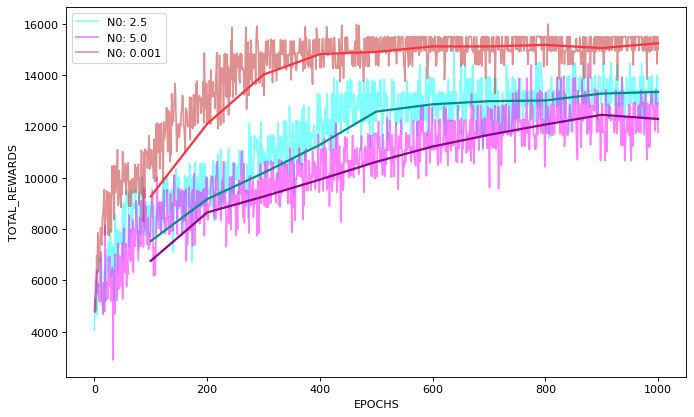

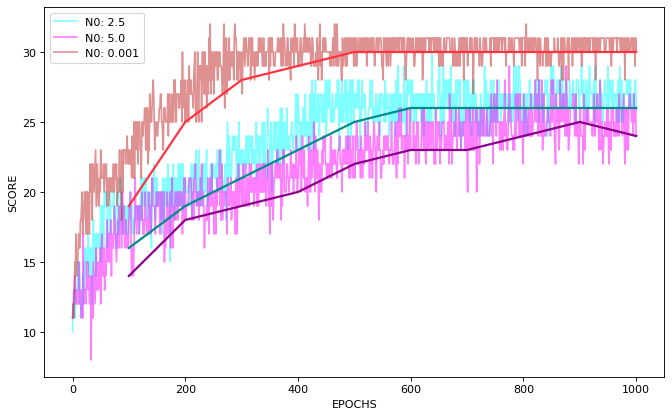

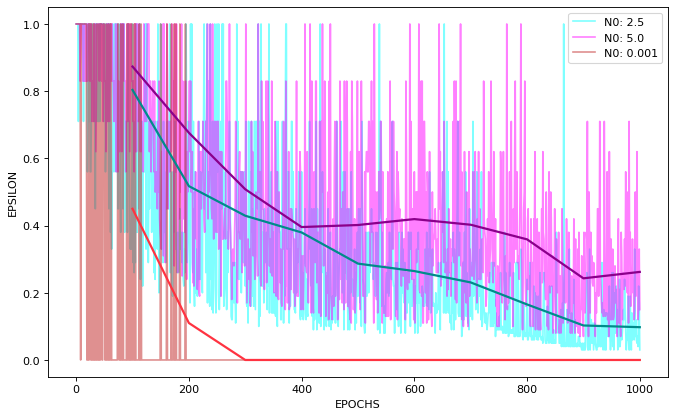

In [10]:
ax = display_3graph(N5['TOTAL_REWARDS'].to_numpy(), N6['TOTAL_REWARDS'].to_numpy(),N7['TOTAL_REWARDS'].to_numpy(), "N0: 2.5", "N0: 5.0", "N0: 0.001", xlabel="EPOCHS", ylabel="TOTAL_REWARDS")

axplot.moving_average(N5['TOTAL_REWARDS'].to_numpy(), ax, label="N0=2.5", color='darkcyan')
axplot.moving_average(N6['TOTAL_REWARDS'].to_numpy(), ax, label="N0=5.0", color='darkmagenta')
axplot.moving_average(N7['TOTAL_REWARDS'].to_numpy(), ax, label="N0=0.001", color='#FF3341')

axSCORE = display_3graph(N5['SCORE'].to_numpy(), N6['SCORE'].to_numpy(),N7['SCORE'].to_numpy(), "N0: 2.5", "N0: 5.0", "N0: 0.001", xlabel="EPOCHS", ylabel="SCORE")

axplot.moving_average(N5['SCORE'].to_numpy(), axSCORE, label="epochs=1001", color='darkcyan')
axplot.moving_average(N6['SCORE'].to_numpy(), axSCORE, label="epochs=1001", color='darkmagenta')
axplot.moving_average(N7['SCORE'].to_numpy(), axSCORE, label="epochs=1001", color='#FF3341')

axEPSILON = display_3graph(N5['EPSILON'].to_numpy(), N6['EPSILON'].to_numpy(),N7['EPSILON'].to_numpy(), "N0: 2.5", "N0: 5.0", "N0: 0.001", xlabel="EPOCHS", ylabel="EPSILON")

axplot.moving_average(N5['EPSILON'].to_numpy(), axEPSILON, label="epochs=1001", color='darkcyan')
axplot.moving_average(N6['EPSILON'].to_numpy(), axEPSILON, label="epochs=1001", color='darkmagenta')
axplot.moving_average(N7['EPSILON'].to_numpy(), axEPSILON, label="epochs=1001", color='#FF3341')

## Conclusion

In this experiments, we can see 

<Axes: xlabel='Epochs', ylabel='EPSILON'>

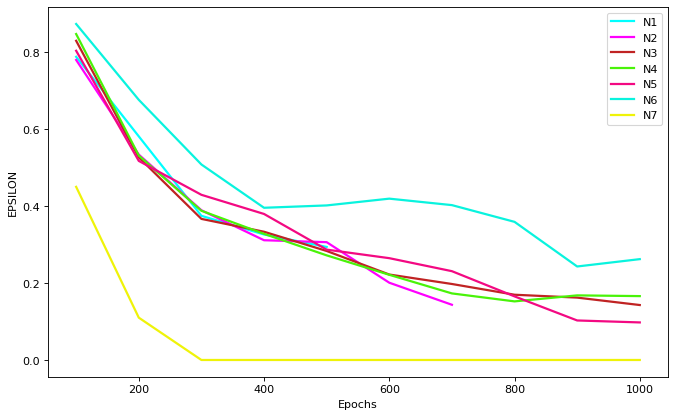

In [11]:
n1Epsilon= N1['EPSILON'].to_numpy()
n2Epsilon= N2['EPSILON'].to_numpy()
n3Epsilon= N3['EPSILON'].to_numpy()
n4Epsilon= N4['EPSILON'].to_numpy()
n5Epsilon= N5['EPSILON'].to_numpy()
n6Epsilon= N6['EPSILON'].to_numpy()
n7Epsilon= N7['EPSILON'].to_numpy()

display_7graph(n1Epsilon, n2Epsilon, n3Epsilon, n4Epsilon , n5Epsilon, n6Epsilon, n7Epsilon, "N1", "N2", "N3", "N4" , "N5", "N6", "N7", "Epochs", "EPSILON" )

<Axes: xlabel='Epochs', ylabel='MEAN_SCORE'>

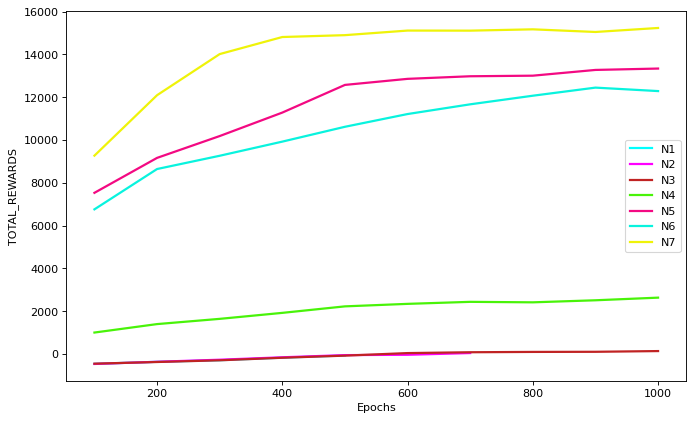

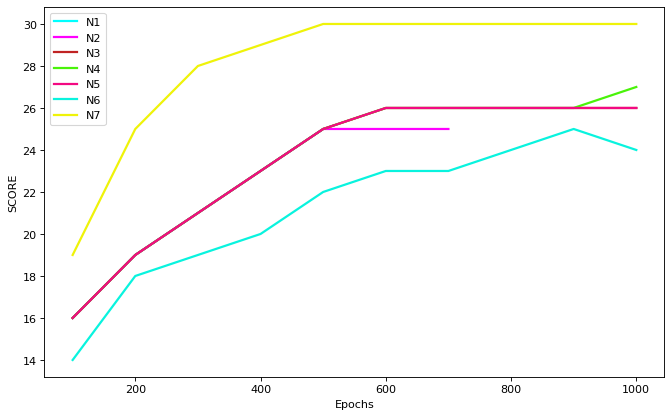

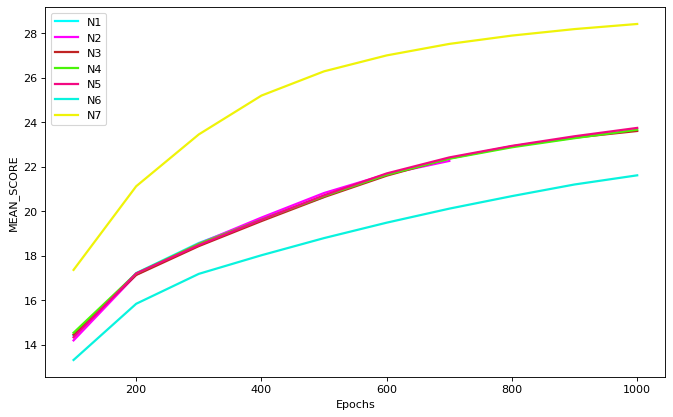

In [12]:
n1TOTAL_REWARDS= N1['TOTAL_REWARDS'].to_numpy()
n2TOTAL_REWARDS= N2['TOTAL_REWARDS'].to_numpy()
n3TOTAL_REWARDS= N3['TOTAL_REWARDS'].to_numpy()
n4TOTAL_REWARDS= N4['TOTAL_REWARDS'].to_numpy()
n5TOTAL_REWARDS= N5['TOTAL_REWARDS'].to_numpy()
n6TOTAL_REWARDS= N6['TOTAL_REWARDS'].to_numpy()
n7TOTAL_REWARDS= N7['TOTAL_REWARDS'].to_numpy()

display_7graph(n1TOTAL_REWARDS, n2TOTAL_REWARDS, n3TOTAL_REWARDS, n4TOTAL_REWARDS , n5TOTAL_REWARDS, n6TOTAL_REWARDS, n7TOTAL_REWARDS, "N1", "N2", "N3", "N4" , "N5", "N6", "N7", "Epochs", "TOTAL_REWARDS" )

n1SCORE= N1['SCORE'].to_numpy()
n2SCORE= N2['SCORE'].to_numpy()
n3SCORE= N3['SCORE'].to_numpy()
n4SCORE= N4['SCORE'].to_numpy()
n5SCORE= N5['SCORE'].to_numpy()
n6SCORE= N6['SCORE'].to_numpy()
n7SCORE= N7['SCORE'].to_numpy()

display_7graph(n1SCORE, n2SCORE, n3SCORE, n4SCORE , n5SCORE, n6SCORE, n7SCORE, "N1", "N2", "N3", "N4" , "N5", "N6", "N7", "Epochs", "SCORE" )

n1MEAN_SCORE= N1['MEAN_SCORE'].to_numpy()
n2MEAN_SCORE= N2['MEAN_SCORE'].to_numpy()
n3MEAN_SCORE= N3['MEAN_SCORE'].to_numpy()
n4MEAN_SCORE= N4['MEAN_SCORE'].to_numpy()
n5MEAN_SCORE= N5['MEAN_SCORE'].to_numpy()
n6MEAN_SCORE= N6['MEAN_SCORE'].to_numpy()
n7MEAN_SCORE= N7['MEAN_SCORE'].to_numpy()

display_7graph(n1MEAN_SCORE, n2MEAN_SCORE, n3MEAN_SCORE, n4MEAN_SCORE , n5MEAN_SCORE, n6MEAN_SCORE, n7MEAN_SCORE, "N1", "N2", "N3", "N4" , "N5", "N6", "N7", "Epochs", "MEAN_SCORE" )

Thus, we can conclude that the `N7` agent is the most optimized and best trained to play freeaway game from Atari.

![Baseline 1](./best_model/BEST_MODEL.gif)

#### Which hyper parameters to choose

Also, this experiment we have demonstrated that to obtain an optimal agent for the freeway game, we must be interested in 3 specific hyper parameters:
- Number of `EPOCHS`
- The `CROSS` reward value
- `N0` value (which allows to calculate the value of EPSILON in relation to the number of times a state has been used)

Indeed, the greater the number of `EPOCHS`, the more precise the different values ​​of each state will be within the QTable. Thus, the agent will take the best choices for state. Be careful however not to go too high because at a certain threshold, the agent will no longer seek to improve his score.

Regarding the reward values, it has been observed that when a very large value is given on the `REWARD_IF_CROSS`, the chicken to cross all the lanes faster and increase the final score but avoids collision with the lanes as much as possible cars.

Finally, we were able to observe that by assigning a very small value to `N0`, the choice of the chicken between exploration or exploitation will diverge towards exploitation as the epochs progress more quickly and thus tend towards 0.

#### Possible improvements

For improve the `N7` agent, we can choose to work on the following hyper parameters:
- `GAMMA`: This value will determine the agent's choice to start with the highest value among the possibilities listed in its QTable.
- `REWARDS_IF_STILL`: This value will determine the reward received if the chicken remains still. Indeed, applying a negative value like -1 to it could lead the agent to advance as soon as he can and thus increase his score and the game more quickly.

##### Thank you for your attention, you can retrive the best model agent serialized in this project (`./best_model/BEST_MODEL.dill`)